# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [46]:
import warnings
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

warnings.filterwarnings(action='ignore')

```bash
Mall Customer Segmentation Data
# id : 고윳값
# gender : 성별,
# income : 소득,
# spendig score : 쇼핑몰에서 부여한 고객의 점수 (소비금액 및 행동 패턴 기반)
# 이라고 한다. (구글링 해서 찾음)
```

In [47]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## 1. Preprocessing / EDA

In [48]:
# 결측치 우선 탐색
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

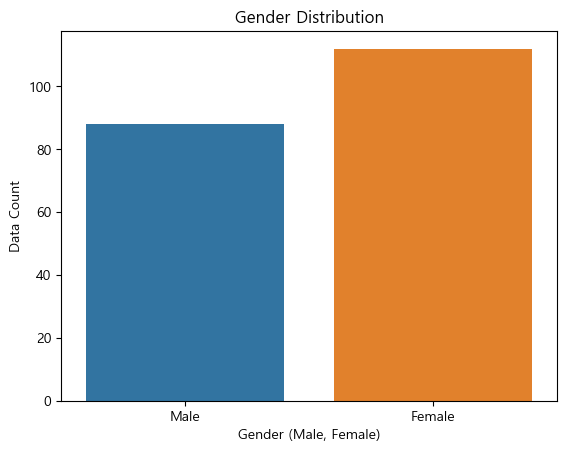

In [49]:
## EDA
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')


sns.countplot(x = df['Gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender (Male, Female)')
plt.ylabel('Data Count')
plt.show()

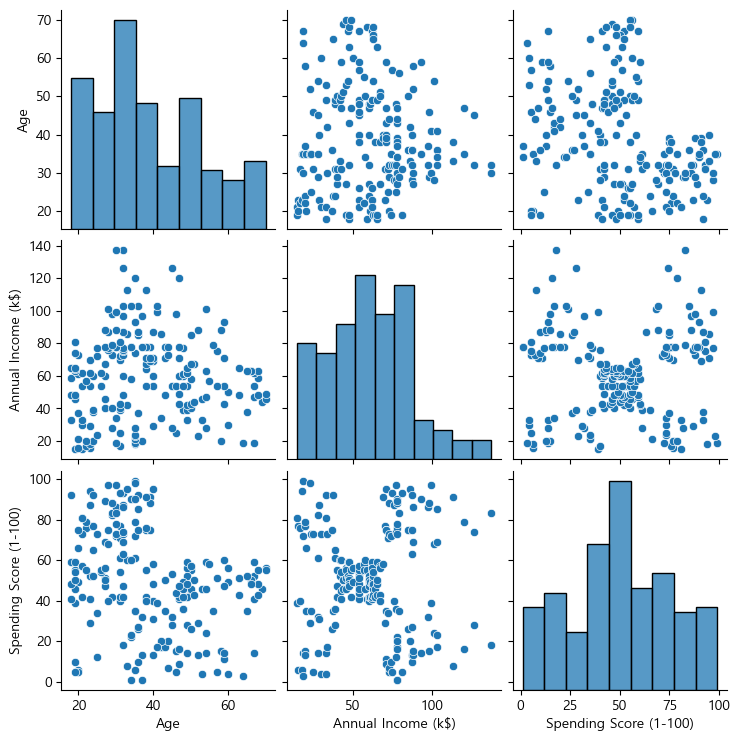

In [50]:
sns.pairplot(df)

확실히 Annual Income과 Spending Score 간의 데이터 분포가 Clustering에 적합해 보인다 !

In [51]:
# Clustering 이전에, String 변수 타입 변환
target = [
    {'col' : 'Gender', 'bVal' : 'Female', 'aVal' : 0 },
    {'col' : 'Gender', 'bVal' : 'Male', 'aVal' : 1 }
]

def changeValue(df, info):
    for _info in info:
        col, bVal, aVal = _info.values()
        df.loc[df[col] == bVal, col] = aVal

changeValue(df, target)

## 2. Clustering

추가 실습과제를 참고해서, `Hierarchical Clustering`과 `K-Means Clustering` 진행

### 2-1. Hierarchical clustering

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99226B4F5D97366030" />

위 세가지 방식에 따른 Clustering 과정을 시각화해서 한번 보자.

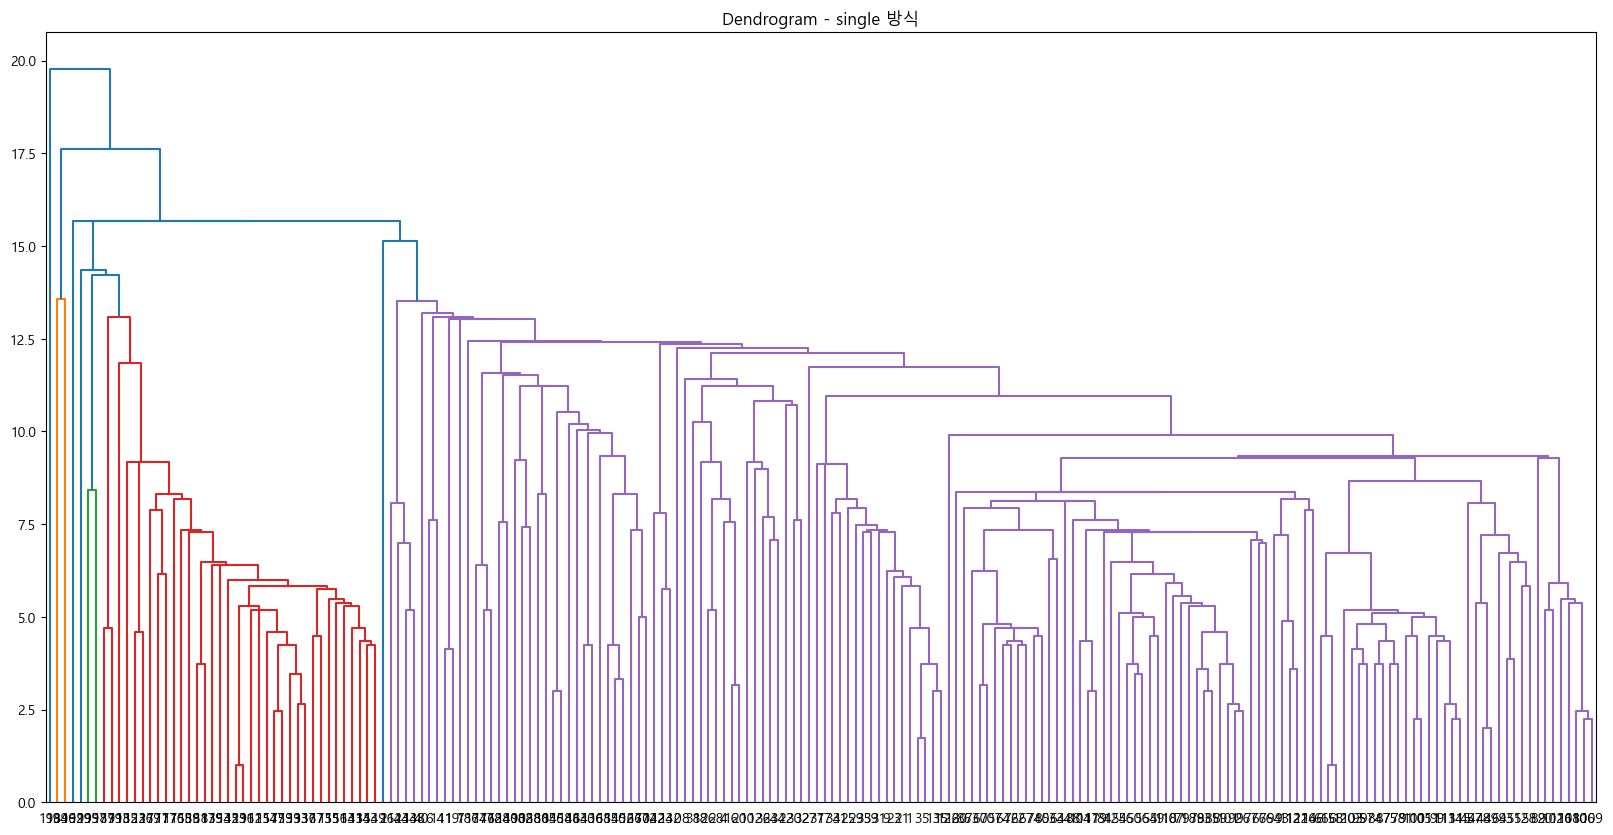

In [52]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

# Complete 방식으로 linkage
# linkage => 거리를 정하는 방식

def showPltAfterDendrogram(df, method):
    cluster = linkage(df, method = method)
    plt.figure(figsize=(20,10))
    plt.title("Dendrogram - "+ method +" 방식")

    dendrogram(cluster, leaf_rotation=0, leaf_font_size =10)

    plt.show()

showPltAfterDendrogram(df, 'single')

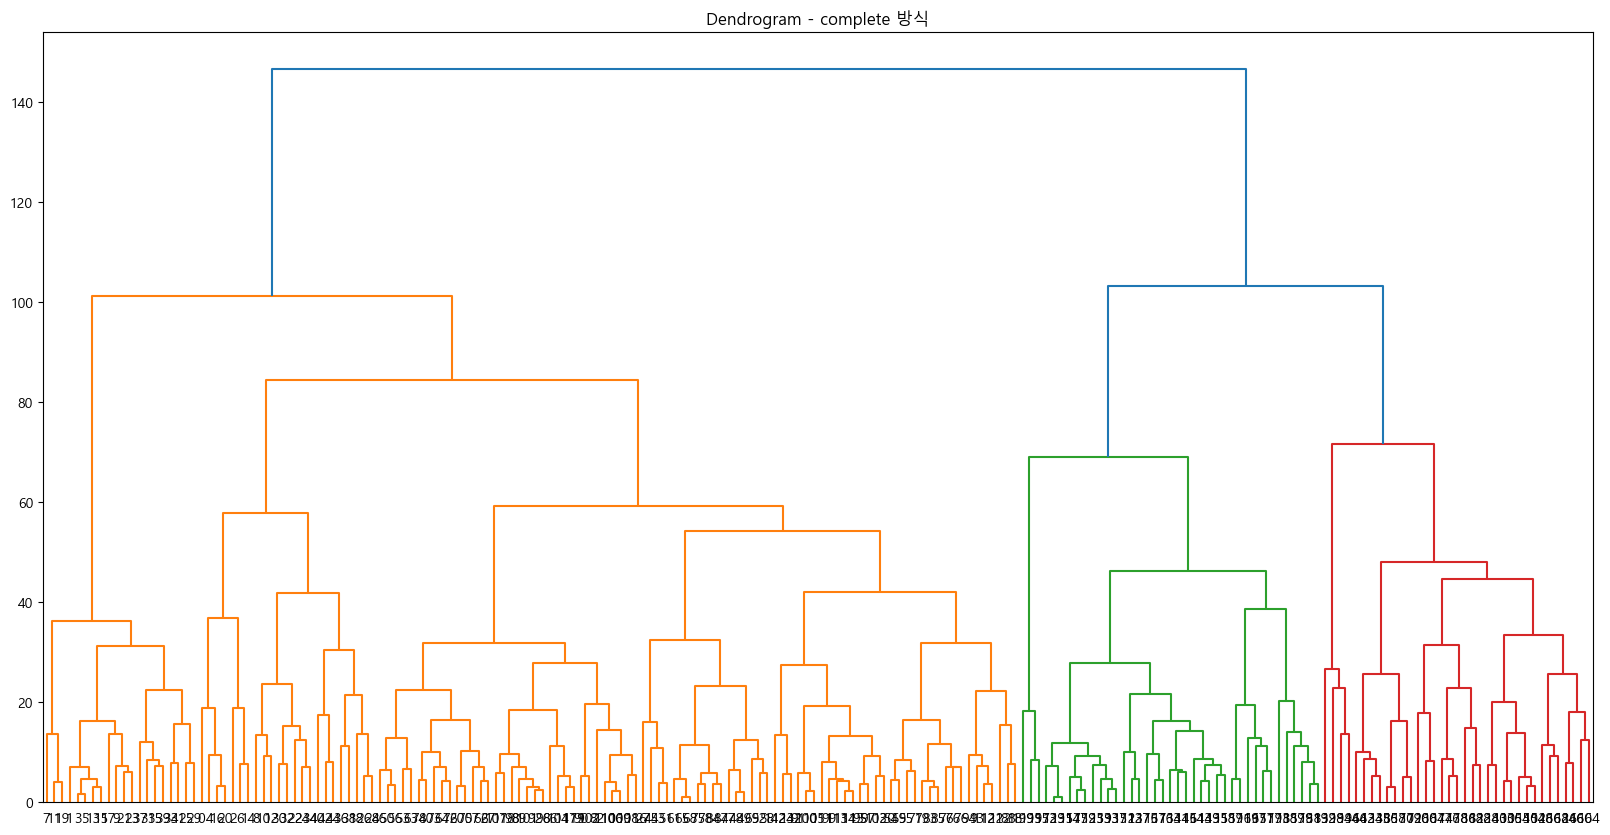

In [53]:
showPltAfterDendrogram(df, 'complete')

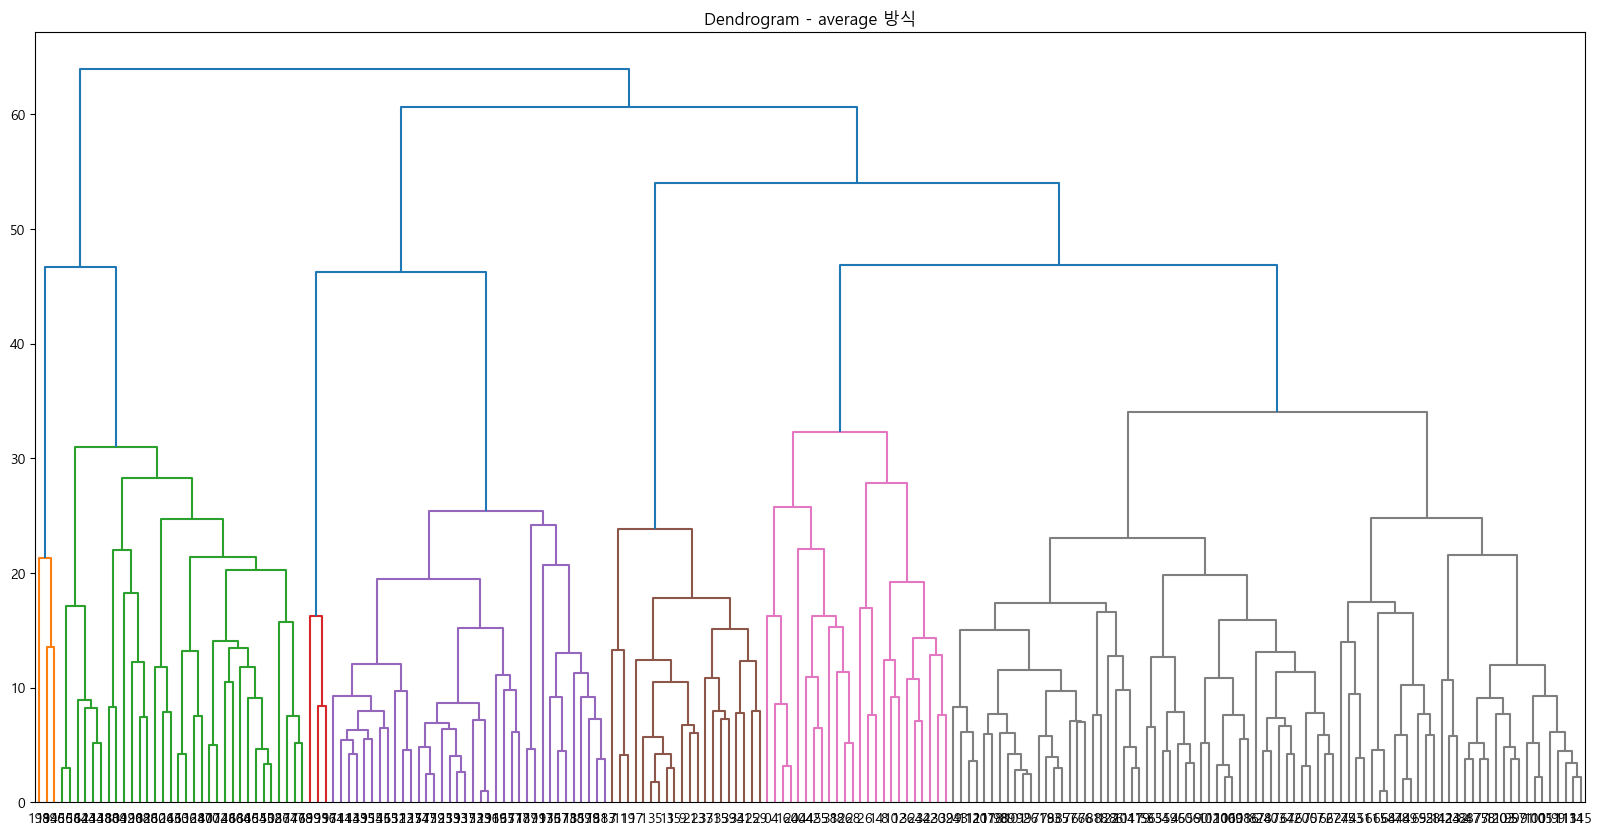

In [54]:
showPltAfterDendrogram(df, 'average')

### 2-2. K-means

In [55]:
# 먼저, elbow method로 적절한 k값을 정하기
from sklearn.cluster import KMeans

n_cluster = []
sse = []
for n in range(1, 25, 2):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df)
    n_cluster += [n]
    sse += [kmeans.inertia_]

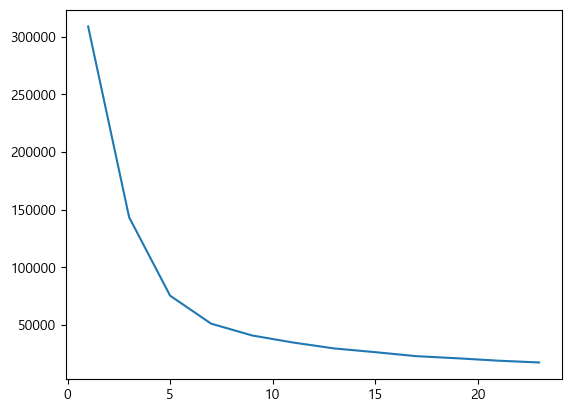

In [56]:
plt.plot(n_cluster, sse)
plt.show()

Elbow Point로 5 ~ 7 정도가 적당하겠다고 생각했다.

이어서, 실루엣 계수를 확인해서 클러스터링 정도에 대해 비교해 보았음

In [61]:
kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(df)

from sklearn.metrics import silhouette_score
s_score = silhouette_score(df, kmeans.labels_)

print('s_score : %0.3f' % s_score)

s_score : 0.452


n_clusters = 6 일때가 0.452로 가장 컸다 (5, 7의 경우 0.44)

해당 값을 k값으로 정하고 진행

In [62]:
# 데이터 별로, Cluter값이 정해짐
# 기존 dataframe에 추가해서 plot에서 확인
kmeans.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1, 5,
       3, 4, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

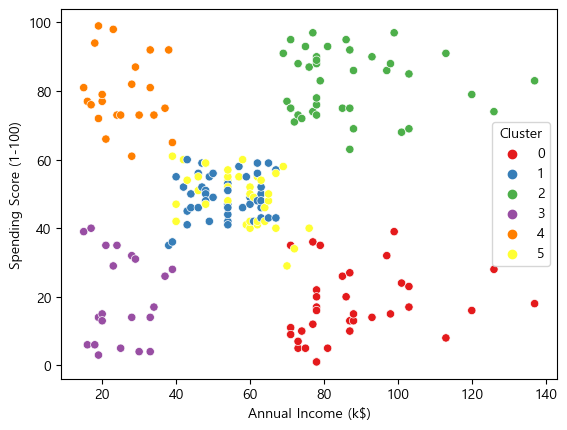

In [65]:
df_extra = df.copy()
df_extra['Cluster'] = kmeans.labels_

sns.scatterplot(
    x = df_extra['Annual Income (k$)'], 
    y = df_extra['Spending Score (1-100)'],
    hue = df_extra['Cluster'], 
    palette='Set1', 
    legend='full'
)

plt.show()